<a href="https://colab.research.google.com/github/etonegithub/CS_345/blob/main/CS345_Final_Project_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis for Spotify user reviews.**

This project performs sentiment analysis on Spotify user reviews and aims to characterize positive and negative reviews with the use of machine learning algorithms. This is done using a publicly available dataset containing positive and negative reviews from users of spotify. Different methods of preprocessing data are explored as well as different machine learning classifiers. Then it is determined which combination of preprocessing data and classifier are most accurate at completing sentiment analysis given the dataset.

Link to Kaggle page for dataset: https://www.kaggle.com/datasets/alexandrakim2201/spotify-dataset/data

**To run, place the DATASET.CSV file from Kaggle in the same directory as this notebook.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_colwidth', None)

IMPORT DATA

This notebook requires the viewer to download the dataset from the kaggle website, rename it to "DATASET.csv", and then import it into the notebook workspace files. This code cell will then load the file contents into a dataset of strings as the features and labels indicating a positive or negative review.

In [ ]:
def import_data(filepath = 'DATASET.csv'):
  df = pd.read_csv(filepath)
  df = df.dropna(subset=['Review'])
  return df

If you wish to place the data file in a different pace than this notebook, enter the path to the datafile as the parameter for import_data()

In [ ]:
df = import_data()

**Data Analysis**

In [ ]:
df.head(10)

,Review,label
0,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.",POSITIVE
1,Please ignore previous negative rating. This app is super great. I give it five stars+,POSITIVE
2,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,NEGATIVE
5,The player controls sometimes disappear for no reason. App restart forgets what I was playing but fixes the issue.,NEGATIVE
6,I love the selection and the lyrics are provided with the song you're listening to!,POSITIVE
7,"Still extremely slow when changing storage to external sd card.. I'm convinced this is done on purpose, spotify knows of this issue and has done NOTHING to solve it! Over time I have changed sd cards, each being faster in read, write speeds(all samsung brand). And please add ""don't like song"" so it will never appear again in my searches or playlists.",NEGATIVE
8,"It's a great app and the best mp3 music app I have ever used but there is one problem that, why can't we play some songs or find some songs? despite this the app is wonderful I recommend it. it's just the best.",POSITIVE
9,"I'm deleting this app, for the following reasons: This app now has a failing business model. Whether streaming services like it, or not: the consumer doesn't want to pay for music they can't fully own, and 6 ads successively, upon logging in, before a single song, is too much. Closed the app during ad number 6, and I'm more patient than most. If those are the only ways you can profit: you've already peaked. All that's left is your decline.",NEGATIVE


The dataset we are using is a collection of app reviews for Spotify from the Google Play Store. Each review is labeled as either "POSITIVE" or "NEGATIVE" based on its overall sentiment.

The data is pre-sanitized from things like HTML or links, but includes special characters, punctuation, and some null values. The null values are immediately dropped from the dataset on import, so we won't need to worry about those going forward.

In [ ]:
print(df.columns, '\n')
print(df['label'].value_counts())

Index(['Review', 'label'], dtype='object') 

label
NEGATIVE    29423
POSITIVE    23263
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

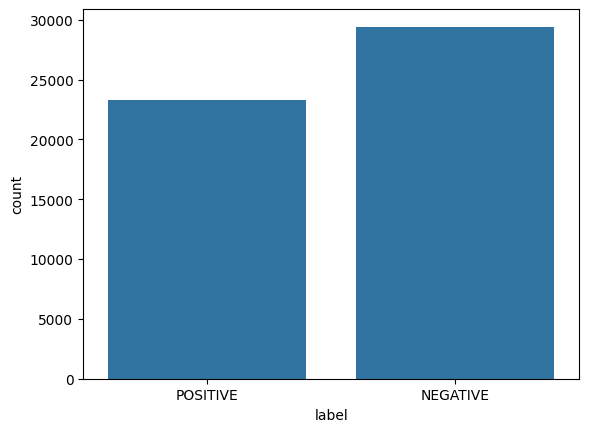

In [ ]:
sns.countplot(x='label', data=df)

The data is fairly balanced, which a minor weight towards negative reviews. This shouldn't be a major detriment towards the training of our models.

**DATA PREPROCESSING**

Before actually training a model on the data, preprocessing needs to be done on the data. There are a few different preprocessing operations, and  their effects on the overall accuracy of the models will be analyzed. These preprocessing operations include: Cleaning, Tokenization, Stopword Removal, Stemming, and Lemmatization.

Many of these operations can be completed automatically through NLTK's CountVectorizer. In the interest of learning and explaining them, we chose to implement them ourselves and test the performance and accuracy against the CountVectorizer() implementation.

Some preprocessing operations, like Cleaning and Tokenization, are required to input the data into a model. Other operations: Stopword Removal, Stemming, and Lemmatization; are optional and may increase or decrease the accuracy of the overall model depending on how and when they are implemented.

In [ ]:
import re

In [ ]:
def alphabetic(text):
  alpha_text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  return alpha_text

def lowercase(text):
  return text.lower()

# NOT BEING USED
def negation_substitution(text):
  return None

def remove_whitespace(text):
  snipped_text = re.sub(r'\s+', ' ', text)
  return snipped_text

def clean_text(text):
  cleaned_text = alphabetic(text)
  cleaned_text = lowercase(cleaned_text)
  return cleaned_text

TOKENIZATION

Tokenization is the act of seperating strings into separate "tokens". There are different ways to split strings into tokens, but this project seperates strings into words as it is a good balance between accuracy and computational power when fitting them to the models. Separating the strings into sentences would be simple but not very accurate while splitting the strings into syllables could be more precise but requires plenty of computational power when fitting to the models.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def tokenize(text):
  tokens = word_tokenize(text)
  return tokens

REMOVE STOPWORDS

Stop words are commons words in a language that don't provide much meaning on their own (pronouns, articles, etc). In this step, we remove stopwords from the text based on the NLTK stopword dictionary.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(tokens):
  stop_words = set(stopwords.words('english'))
  # can import custom stopwords if necessary

  return [word for word in tokens if word not in stop_words]

STEMMING

Stemming is the act of putting words into a root form by removing prefixes and suffixes from them. This is done to standardize the words. This process is typically done after tokenization and can allow for greater accuracy from tokenization on its own. The downside is that stemming can create root forms of words that aren’t valid words which can negatively affect the accuracy of the classifiers. There are many algorithms of stemming but only the simple form will be used here.

In [ ]:
from nltk.stem.porter import PorterStemmer

def stem(tokens):
  stemmer = PorterStemmer()
  return [stemmer.stem(word) for word in tokens]

LEMMATIZATION

Lemmatization is similar to stemming in which words are converted into their root forms referred to as lemma. However, instead of only removing prefixes and suffixes, lemmatization adds context to each word by linking them to similar words. For example, “rocks” would transform into “rock” and “better” would transform into “good”. This morphological analysis of the tokenized words is oftentimes preferred over stemming but has flaws of its own. It is time consuming since it needs to parse data and do lookups with dictionaries and other similar databases. It also cannot understand the context of the word being used which could result in an incorrect meaning and use of the word. An example would be referring to a sound as “awfully quiet” which can be good or bad depending on the context but with lemmatization it transforms to “bad quiet” which is always negative. This discrepancy can affect sentiment analysis algorithms in instances where the context is positive but it is classified as negative. Lemmatization also has different algorithms but a basic one from NLTK will be used here.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize(tokens):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**FEATURE EXTRACTION**

After preprocessing the data, features can be extracted from it. There are also multiple ways to do this.

The simplest is Frequency Vectors, in which input words are converted to vectors with based on the frequency with which they occur in the text.

Another way to extract features is to use one-hot encoding, the input words are

This begins by using term frequency (TF) which represents the frequency of the appearance of specific words or lemma (depending on the specific preprocessing methods used) within the string. This method can determine whether positive or negative words are used more often and determine the sentiment from there. However, this method does not cover the cases when insignificant words such as “of” and “and” appear more frequently than positive or negative words which can negatively affect the classification of sentiments.

To solve this issue, Inverse document frequency (IDF) is done as well. IDF adds weight to words depending on their frequency in the dataset of strings. Words that appear frequently across strings will have a lower weight where as words that appear less frequently will have higher weights. This helps to minimize the impact of words like "of", "the", and "and".

A product of IDF and TF is then used to determine the importance of words on a scale from zero to one. The higher the number, the more important the word is. These numbers are the numerical data for the frequency vector.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

CENTRAL DATA PROCESSING HUB

Each function provides a different method of data processing. Their accuracies will be determined using cross-validation and compared to each other to determine which is best to use.

In [ ]:
# cleaning only
def data_preprocessing_3(df):
  df['Clean_Review'] = df['Review'].apply(clean_text)
  df['Tokens'] = df['Review'].apply(tokenize)
  df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)
  return df['Filtered_Tokens'].apply(lambda tokens: ' '.join(tokens)), df['label']

# cleaning + stemming
def data_preprocessing_4(df):
  df['Clean_Review'] = df['Review'].apply(clean_text)
  df['Tokens'] = df['Review'].apply(tokenize)
  df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)
  df['Stemmed_Tokens'] = df['Filtered_Tokens'].apply(stem)
  return df['Stemmed_Tokens'].apply(lambda tokens: ' '.join(tokens)), df['label']

# cleaning + lemmatization
def data_preprocessing_5(df):
  df['Clean_Review'] = df['Review'].apply(clean_text)
  df['Tokens'] = df['Review'].apply(tokenize)
  df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)
  df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize)
  return df['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens)), df['label']

# ------------------------------
# ^^^^ above not being used ^^^^
# ------------------------------

# Cleaning only
def data_preprocessing_1(text):
  cleaned_text = clean_text(text)
  tokens = tokenize(cleaned_text)
  tokens = remove_stopwords(tokens)
  return ' '.join(tokens)

# Cleaning + stemming
def data_preprocessing_2(text):
  cleaned_text = clean_text(text)
  tokens = tokenize(cleaned_text)
  tokens = remove_stopwords(tokens)
  tokens = stem(tokens)
  return ' '.join(tokens)

# Cleaning + lemmatization
def data_preprocessing_3(text):
  cleaned_text = clean_text(text)
  tokens = tokenize(cleaned_text)
  tokens = remove_stopwords(tokens)
  tokens = lemmatize(tokens)
  return ' '.join(tokens)

**FEATURE EXTRACTION**

After preprocessing the data, features can be extracted from it. There are also multiple ways to do this.

The simplest is Frequency Vectors, in which words are converted to vectors with based on the frequency with which they occur in the input text.

Another way to extract features is to use one-hot encoding, the words are converted to vectors only based on whether they occur in the input text at all, with no change based on frequency.

The last and most complicated way to extract features (that we will go over in this report) is TF-IDF, or Term Frequency-Inverse Document Frequency.

This begins by using term frequency (TF) which represents the frequency of the appearance of specific words or lemma (depending on the specific preprocessing methods used) within the string. This method can determine whether positive or negative words are used more often and determine the sentiment from there. However, this method does not cover the cases when insignificant words such as “of” and “and” appear more frequently than positive or negative words which can negatively affect the classification of sentiments.

To solve this issue, Inverse document frequency (IDF) is done as well. IDF adds weight to words depending on their frequency in the dataset of strings. Words that appear frequently across strings will have a lower weight where as words that appear less frequently will have higher weights. This helps to minimize the impact of words like "of", "the", and "and".

A product of IDF and TF is then used to determine the importance of words on a scale from zero to one. The higher the number, the more important the word is. These numbers are the numerical data for the frequency vector.

We will be experimenting with each of these ways to extract features and comparing their results against each other.

**MODELS**

The machine learning classifier models being used are Logistic Regression and Naive Bayes. We decided to only use 2 models because the focus of this report is on the preprocessing and feature extraction methods, not the models themselves. We found that these classifiers are particularly suited for machine learning problems that deal with language such as sentiment analysis.

We will be using GridSearchCV to optimize their hyperpamaters and ensure cross-validation.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, precision_score, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt
from IPython.display import display

pd.options.display.float_format = "{:,.2f}".format
random_state = 1
X, y = df['Review'], df['label']

In [ ]:
# TF-IDF WITH ONLY CLEANING


# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)


# Pipeline initliazation
tf_with_cleaning_pipeline_logreg = Pipeline([
    ('count', CountVectorizer(preprocessor=data_preprocessing_1)),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression())
])

tf_with_cleaning_pipeline_nb = Pipeline([
    ('count', CountVectorizer(preprocessor=data_preprocessing_1)),
    ('tfidf', TfidfTransformer()),
    ('nb', MultinomialNB())
])


# Gridsearch initialization and fitting
tf_with_cleaning_gridsearch_logreg = GridSearchCV(tf_with_cleaning_pipeline_logreg, param_grid={'count__ngram_range':[(1, 1), (1, 2)], 'logreg__C':[0.1, 1]}, cv=2, scoring='accuracy')
tf_with_cleaning_gridsearch_nb = GridSearchCV(tf_with_cleaning_pipeline_nb, param_grid={'count__ngram_range':[(1, 1), (1, 2)], 'nb__alpha': [ 0.1, 1]}, cv=2, scoring='accuracy')

tf_with_cleaning_gridsearch_logreg.fit(X_train, y_train)
tf_with_cleaning_gridsearch_nb.fit(X_train, y_train)


# test data doesn't need to be manually preprocessed, this is automatically handled by GridSearchCV when calling best_estimator_.predict()

# Prediction and results
best_tf_with_cleaning_logreg = tf_with_cleaning_gridsearch_logreg.best_estimator_
tf_with_cleaning_pred_logreg = best_tf_with_cleaning_logreg.predict(X)
tf_with_cleaning_classification_report_logreg = classification_report(y_test, tf_with_cleaning_pred_logreg, output_dict=True)
tf_with_cleaning_roc_auc_score_logreg = roc_auc_score(y_test, best_tf_with_cleaning_logreg.predict_proba(X_test)[:, 1])
tf_with_cleaning_cm_logreg = confusion_matrix(y_test, tf_with_cleaning_pred_logreg)

best_tf_with_cleaning_nb = tf_with_cleaning_gridsearch_nb.best_estimator_
tf_with_cleaning_pred_nb = best_tf_with_cleaning_nb.predict(X)
tf_with_cleaning_classification_report_nb = classification_report(y_test, tf_with_cleaning_pred_nb, output_dict=True)
tf_with_cleaning_roc_auc_score_nb = roc_auc_score(y_test, best_tf_with_cleaning_nb.predict_proba(X_test)[:, 1])
tf_with_cleaning_cm_nb = confusion_matrix(y_test, tf_with_cleaning_pred_nb)


# Results display
print("LOGISTIC REGRESSION\n")
print("Best params: ", tf_with_cleaning_gridsearch_logreg.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(tf_with_cleaning_classification_report_logreg).transpose())
print("\nROC AUC Score: ", tf_with_cleaning_roc_auc_score_logreg)
print("\n\nNAIVE BAYES\n")
print("Best params: ", tf_with_cleaning_gridsearch_nb.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(tf_with_cleaning_classification_report_nb).transpose())
print("\nROC AUC Score: ", tf_with_cleaning_roc_auc_score_nb)
print()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=tf_with_cleaning_cm_logreg, display_labels=["Negative", "Positive"])
disp1.plot(ax=axes[0], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[0].set_title("Logistic Regression");

disp2 = ConfusionMatrixDisplay(confusion_matrix=tf_with_cleaning_cm_nb, display_labels=["Negative", "Positive"])
disp2.plot(ax=axes[1], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[1].set_title("Naive Bayes");


KeyboardInterrupt: 

LOGISTIC REGRESSION

Best params:  {'count__ngram_range': (1, 1), 'logreg__C': 1}

Classification Report:



,precision,recall,f1-score,support
NEGATIVE,0.88,0.90,0.89,"5,885.00"
POSITIVE,0.88,0.85,0.86,"4,653.00"
accuracy,0.88,0.88,0.88,0.88
macro avg,0.88,0.88,0.88,"10,538.00"
weighted avg,0.88,0.88,0.88,"10,538.00"



ROC AUC Score:  0.950844002855066


NAIVE BAYES

Best params:  {'count__ngram_range': (1, 2), 'nb__alpha': 0.1}

Classification Report:



,precision,recall,f1-score,support
NEGATIVE,0.86,0.90,0.88,"5,885.00"
POSITIVE,0.86,0.82,0.84,"4,653.00"
accuracy,0.86,0.86,0.86,0.86
macro avg,0.86,0.86,0.86,"10,538.00"
weighted avg,0.86,0.86,0.86,"10,538.00"



ROC AUC Score:  0.9356264793673278



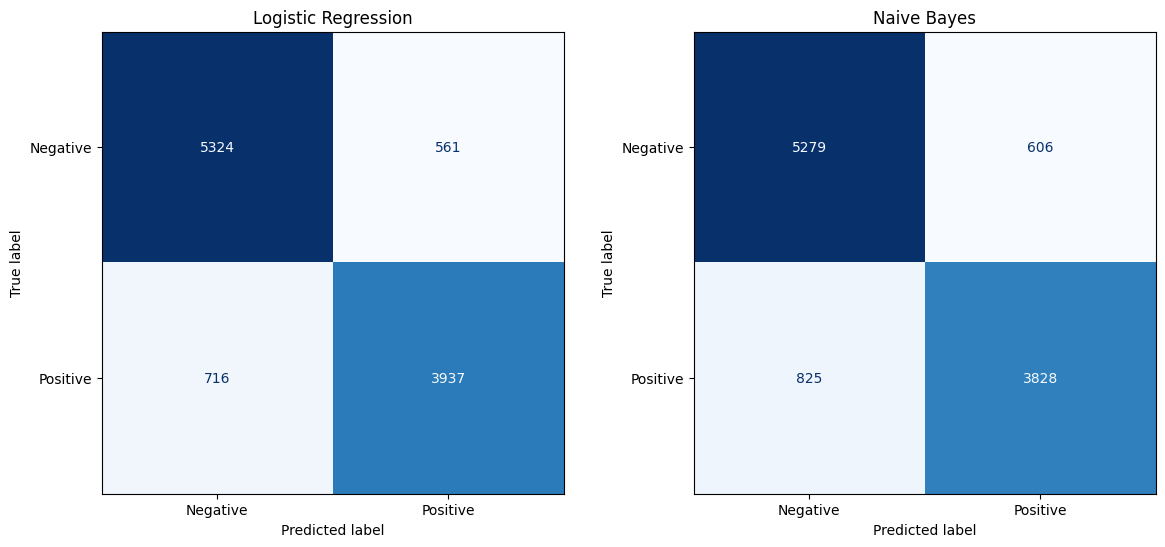

In [ ]:
# TFIDF WITH CLEANING AND STEMMING


# Data split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)



# Pipeline initialization
tf_with_stemming_pipeline_logreg = Pipeline([
    ('count', CountVectorizer(preprocessor=data_preprocessing_2)),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression())
])

tf_with_stemming_pipeline_nb = Pipeline([
    ('count', CountVectorizer(preprocessor=data_preprocessing_2)),
    ('tfidf', TfidfTransformer()),
    ('nb', MultinomialNB())
])


# Gridsearch intialization and fitting
tf_with_stemming_gridsearch_logreg = GridSearchCV(tf_with_stemming_pipeline_logreg, param_grid={'count__ngram_range':[(1, 1), (1, 2)], 'logreg__C':[0.1, 1]}, cv=2, scoring='accuracy')
tf_with_stemming_gridsearch_nb = GridSearchCV(tf_with_stemming_pipeline_nb, param_grid={'count__ngram_range':[(1, 1), (1, 2)], 'nb__alpha': [ 0.1, 1]}, cv=2, scoring='accuracy')

tf_with_stemming_gridsearch_logreg.fit(X2_train, y2_train)
tf_with_stemming_gridsearch_nb.fit(X2_train, y2_train)


# Prediction and results
best_tf_with_stemming_logreg = tf_with_stemming_gridsearch_logreg.best_estimator_
tf_with_stemming_pred_logreg = best_tf_with_stemming_logreg.predict(X2_test)
tf_with_stemming_classification_report_logreg = classification_report(y2_test, tf_with_stemming_pred_logreg, output_dict=True)
tf_with_stemming_roc_auc_score_logreg = roc_auc_score(y2_test, best_tf_with_stemming_logreg.predict_proba(X2_test)[:, 1])
tf_with_stemming_cm_logreg = confusion_matrix(y2_test, tf_with_stemming_pred_logreg)

best_tf_with_stemming_nb = tf_with_stemming_gridsearch_nb.best_estimator_
tf_with_stemming_pred_nb = best_tf_with_stemming_nb.predict(X2_test)
tf_with_stemming_classification_report_nb = classification_report(y2_test, tf_with_stemming_pred_nb, output_dict=True)
tf_with_stemming_roc_auc_score_nb = roc_auc_score(y2_test, best_tf_with_stemming_nb.predict_proba(X2_test)[:, 1])
tf_with_stemming_cm_nb = confusion_matrix(y2_test, tf_with_stemming_pred_nb)


# Results display
print("LOGISTIC REGRESSION\n")
print("Best params: ", tf_with_stemming_gridsearch_logreg.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(tf_with_stemming_classification_report_logreg).transpose())
print("\nROC AUC Score: ", tf_with_stemming_roc_auc_score_logreg)
print("\n\nNAIVE BAYES\n")
print("Best params: ", tf_with_stemming_gridsearch_nb.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(tf_with_stemming_classification_report_nb).transpose())
print("\nROC AUC Score: ", tf_with_stemming_roc_auc_score_nb)
print()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=tf_with_stemming_cm_logreg, display_labels=["Negative", "Positive"])
disp1.plot(ax=axes[0], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[0].set_title("Logistic Regression");

disp2 = ConfusionMatrixDisplay(confusion_matrix=tf_with_stemming_cm_nb, display_labels=["Negative", "Positive"])
disp2.plot(ax=axes[1], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[1].set_title("Naive Bayes");


We found that stemming caused the model to rate text much more negatively. Even though the ROC AUC score of the stemming model is still very high, the confusion matrix shows a higher rate of false negatives and a lower rate of false positives.

By our research, it can be common for some stemmers like the Porter Stemmer to be too aggressive, resulting in lost meaning in the text. This may be a cause for our loss

LOGISTIC REGRESSION

Best params:  {'count__ngram_range': (1, 1), 'logreg__C': 1}
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.89      0.91      0.90      5885
    POSITIVE       0.88      0.85      0.86      4653

    accuracy                           0.88     10538
   macro avg       0.88      0.88      0.88     10538
weighted avg       0.88      0.88      0.88     10538

ROC AUC Score:  0.9509264265423992


NAIVE BAYES

Naive Bayes Best params:  {'count__ngram_range': (1, 2), 'nb__alpha': 0.1}
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.86      0.90      0.88      5885
    POSITIVE       0.86      0.82      0.84      4653

    accuracy                           0.86     10538
   macro avg       0.86      0.86      0.86     10538
weighted avg       0.86      0.86      0.86     10538

ROC AUC Score:  0.9349229382346396



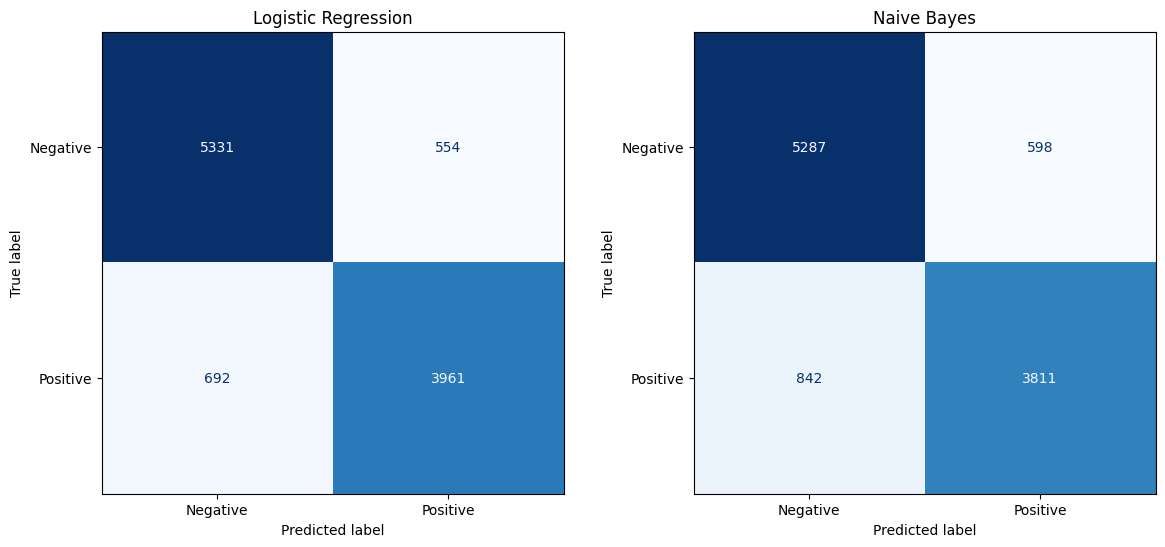

In [ ]:
# TF-IDF WITH AND CLEANING LEMMATIZATION


# Data split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)


# Pipeline initialization
tf_with_lemmatization_pipeline_logreg = Pipeline([
    ('count', CountVectorizer(preprocessor=data_preprocessing_3)),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression())
])

tf_with_lemmatization_pipeline_nb = Pipeline([
    ('count', CountVectorizer(preprocessor=data_preprocessing_3)),
    ('tfidf', TfidfTransformer()),
    ('nb', MultinomialNB())
])


# Gridsearch initliazation and fitting
tf_with_lemmatization_gridsearch_logreg = GridSearchCV(tf_with_lemmatization_pipeline_logreg, param_grid={'count__ngram_range':[(1, 1), (1, 2), (2, 2)], 'logreg__C':[0.1, 1, 10]}, cv=3, scoring='accuracy')
tf_with_lemmatization_gridsearch_nb = GridSearchCV(tf_with_lemmatization_pipeline_nb, param_grid={'count__ngram_range':[(1, 1), (1, 2), (2, 2)], 'nb__alpha': [ 0.1, 1, 10]}, cv=3, scoring='accuracy')

tf_with_lemmatization_gridsearch_logreg.fit(X3_train, y3_train)
tf_with_lemmatization_gridsearch_nb.fit(X3_train, y3_train)


# Prediction and results
best_tf_with_lemmatization_logreg = tf_with_lemmatization_gridsearch_logreg.best_estimator_
tf_with_lemmatization_pred_logreg = best_tf_with_lemmatization_logreg.predict(X3_test)
tf_with_lemmatization_classification_report_logreg = classification_report(y3_test, tf_with_lemmatization_pred_logreg, output_dict=True)
tf_with_lemmatization_roc_auc_score_logreg = roc_auc_score(y3_test, best_tf_with_lemmatization_logreg.predict_proba(X3_test)[:, 1])
tf_with_lemmatization_cm_logreg = confusion_matrix(y3_test, tf_with_lemmatization_pred_logreg)

best_tf_with_lemmatization_nb = tf_with_lemmatization_gridsearch_nb.best_estimator_
tf_with_lemmatization_pred_nb = best_tf_with_lemmatization_nb.predict(X3_test)
tf_with_lemmatization_classification_report_nb = classification_report(y3_test, tf_with_lemmatization_pred_nb, output_dict=True)
tf_with_lemmatization_roc_auc_score_nb = roc_auc_score(y3_test, best_tf_with_lemmatization_nb.predict_proba(X3_test)[:, 1])
tf_with_lemmatization_cm_nb = confusion_matrix(y3_test, tf_with_lemmatization_pred_nb)


# Results Display
print("LOGISTIC REGRESSION\n")
print("Best params: ", tf_with_lemmatization_gridsearch_logreg.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(tf_with_lemmatization_classification_report_logreg).transpose())
print("\nROC AUC Score: ", tf_with_lemmatization_roc_auc_score_logreg)
print("\n\nNAIVE BAYES\n")
print("Best params: ", tf_with_lemmatization_gridsearch_nb.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(tf_with_lemmatization_classification_report_nb).transpose())
print("\nROC AUC Score: ", tf_with_lemmatization_roc_auc_score_nb)
print()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=tf_with_lemmatization_cm_logreg, display_labels=["Negative", "Positive"])
disp1.plot(ax=axes[0], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[0].set_title("Logistic Regression");

disp2 = ConfusionMatrixDisplay(confusion_matrix=tf_with_lemmatization_cm_nb, display_labels=["Negative", "Positive"])
disp2.plot(ax=axes[1], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[1].set_title("Naive Bayes");

Stemming and Lemmatization

LOGISTIC REGRESSION

Best params:  {'tfidf__ngram_range': (1, 2)}
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.89      0.93      0.91      5885
    POSITIVE       0.91      0.85      0.88      4653

    accuracy                           0.90     10538
   macro avg       0.90      0.89      0.89     10538
weighted avg       0.90      0.90      0.90     10538

ROC AUC Score:  0.960981276456972


NAIVE BAYES

Naive Bayes Best params:  {'tfidf__ngram_range': (1, 1)}
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.83      0.93      0.88      5885
    POSITIVE       0.90      0.76      0.83      4653

    accuracy                           0.86     10538
   macro avg       0.87      0.85      0.85     10538
weighted avg       0.86      0.86      0.86     10538

ROC AUC Score:  0.9382106829059956



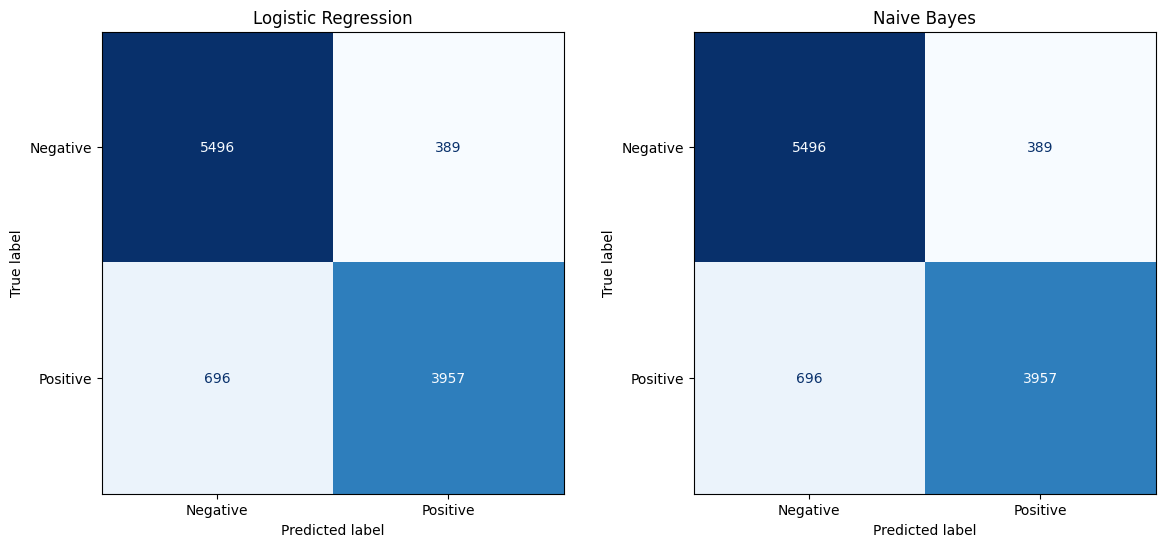

In [ ]:
# TFIDF WITH COUNTVECTORIZER


# Data split
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)


# Pipeline initialization
tfidfvectorizer_pipeline_logreg = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

tfidfvectorizer_pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])


# Gridsearch initialization and fitting
tfidfvectorizer_gridsearch_logreg = GridSearchCV(tfidfvectorizer_pipeline_logreg, param_grid={'tfidf__ngram_range':[(1, 1), (1, 2), (2, 2)], 'logreg__C': [ 0.1, 1, 10]}, cv=3, scoring='accuracy')
tfidfvectorizer_gridsearch_nb = GridSearchCV(tfidfvectorizer_pipeline_nb, param_grid={'tfidf__ngram_range':[(1, 1), (1, 2), (2, 2)], 'nb__alpha': [ 0.1, 1, 10]}, cv=3, scoring='accuracy')

tfidfvectorizer_gridsearch_logreg.fit(X4_train, y4_train)
tfidfvectorizer_gridsearch_nb.fit(X4_train, y4_train)


# Prediction and results
best_tfidfvectorizer_logreg = tfidfvectorizer_gridsearch_logreg.best_estimator_
tfidfvectorizer_pred_logreg = best_tfidfvectorizer_logreg.predict(X4_test)
tfidfvectorizer_classification_report_logreg = classification_report(y4_test, tfidfvectorizer_pred_logreg, output_dict=True)
tfidfvectorizer_roc_auc_score_logreg = roc_auc_score(y4_test, best_tfidfvectorizer_logreg.predict_proba(X4_test)[:, 1])
tfidfvectorizer_cm_logreg = confusion_matrix(y4_test, tfidfvectorizer_pred_logreg)

best_tfidfvectorizer_nb = tfidfvectorizer_gridsearch_nb.best_estimator_
tfidfvectorizer_pred_nb = best_tfidfvectorizer_nb.predict(X4_test)
tfidfvectorizer_classification_report_nb = classification_report(y4_test, tfidfvectorizer_pred_nb, output_dict=True)
tfidfvectorizer_roc_auc_score_nb = roc_auc_score(y4_test, best_tfidfvectorizer_nb.predict_proba(X4_test)[:, 1])
tfidfvectorizer_cm_nb = confusion_matrix(y4_test, tfidfvectorizer_pred_nb)


# Results display
print("LOGISTIC REGRESSION\n")
print("Best params: ", tfidfvectorizer_gridsearch_logreg.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(tfidfvectorizer_classification_report_logreg).transpose())
print("\nROC AUC Score: ", tfidfvectorizer_roc_auc_score_logreg)
print("\n\nNAIVE BAYES\n")
print("Best params: ", tfidfvectorizer_gridsearch_nb.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(tfidfvectorizer_classification_report_nb).transpose())
print("\nROC AUC Score: ", tfidfvectorizer_roc_auc_score_nb)
print()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=tfidfvectorizer_cm_logreg, display_labels=["Negative", "Positive"])
disp1.plot(ax=axes[0], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[0].set_title("Logistic Regression");

disp2 = ConfusionMatrixDisplay(confusion_matrix=tfidfvectorizer_cm_nb, display_labels=["Negative", "Positive"])
disp2.plot(ax=axes[1], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[1].set_title("Naive Bayes");

LOGISTIC REGRESSION

Best params:  {'count__ngram_range': (1, 2), 'logreg__C': 1}
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.91      0.91      0.91      5885
    POSITIVE       0.88      0.89      0.88      4653

    accuracy                           0.90     10538
   macro avg       0.90      0.90      0.90     10538
weighted avg       0.90      0.90      0.90     10538

AUC-ROC Score:  0.9547993173112933

NAIVE BAYES

Naive Bayes Best params:  {'count__ngram_range': (1, 2), 'nb__alpha': 1}
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.87      0.91      0.89      5885
    POSITIVE       0.88      0.83      0.86      4653

    accuracy                           0.88     10538
   macro avg       0.88      0.87      0.87     10538
weighted avg       0.88      0.88      0.88     10538

AUC-ROC Score:  0.9330887646873113



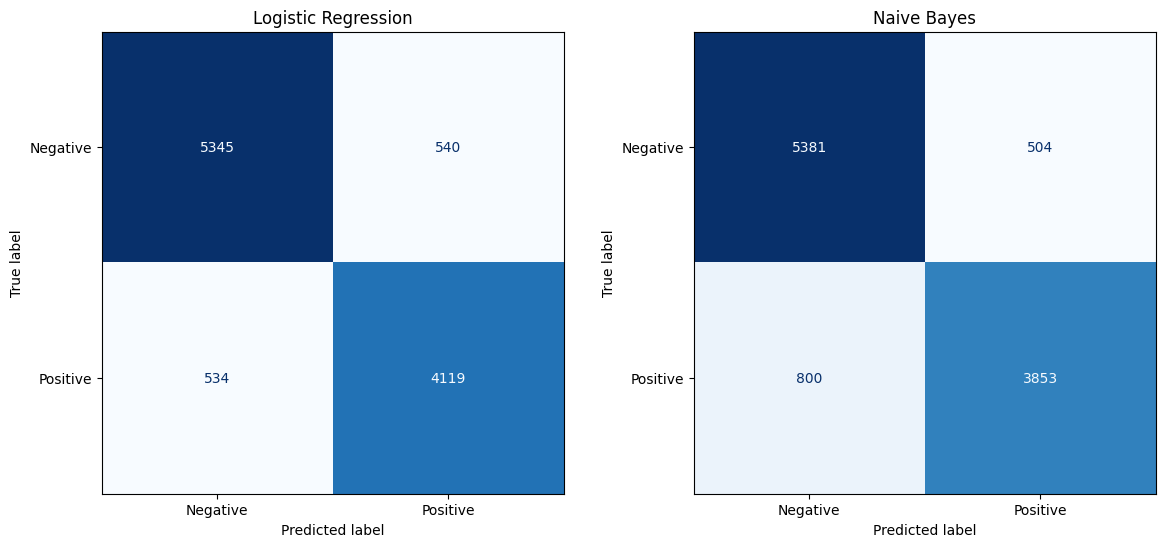

In [ ]:
# FREQUENCY VECTORS


# Data split
X5_train, X5_test, y5_train, y5_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)


# Pipeline initialization
freqvec_pipeline_logreg = Pipeline([
    ('count', CountVectorizer()),
    ('logreg', LogisticRegression(max_iter=500))
])

freqvec_pipeline_nb = Pipeline([
    ('count', CountVectorizer()),
    ('nb', MultinomialNB())
])


# Gridsearch initialization and fitting
freqvec_gridsearch_logreg = GridSearchCV(freqvec_pipeline_logreg, param_grid={'count__ngram_range':[(1, 1), (1, 2), (2, 2)], 'logreg__C': [ 0.1, 1, 10]}, cv=3, scoring='accuracy')
freqvec_gridsearch_nb = GridSearchCV(freqvec_pipeline_nb, param_grid={'count__ngram_range':[(1, 1), (1, 2), (2, 2)], 'nb__alpha': [ 0.1, 1, 10]}, cv=3, scoring='accuracy')

freqvec_gridsearch_logreg.fit(X5_train, y5_train)
freqvec_gridsearch_nb.fit(X5_train, y5_train)


# Prediction and results
best_freqvec_logreg = freqvec_gridsearch_logreg.best_estimator_
freqvec_pred_logreg = best_freqvec_logreg.predict(X5_test)
freqvec_cm_logreg = confusion_matrix(y5_test, freqvec_pred_logreg)
freqvec_classification_report_logreg = classification_report(y5_test, freqvec_pred_logreg, output_dict=True)
freqvec_roc_auc_score_logreg = roc_auc_score(y5_test, best_freqvec_logreg.predict_proba(X5_test)[:, 1])

best_freqvec_nb = freqvec_gridsearch_nb.best_estimator_
freqvec_pred_nb = best_freqvec_nb.predict(X5_test)
freqvec_cm_nb = confusion_matrix(y5_test, freqvec_pred_nb)
freqvec_classification_report_nb = classification_report(y5_test, freqvec_pred_nb, output_dict=True)
freqvec_roc_auc_score_nb = roc_auc_score(y5_test, best_freqvec_nb.predict_proba(X5_test)[:, 1])


# Results display
print("LOGISTIC REGRESSION\n")
print("Best params: ", freqvec_gridsearch_logreg.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(freqvec_classification_report_logreg).transpose())
print("\nROC AUC Score: ", freqvec_roc_auc_score_logreg)
print("\n\nNAIVE BAYES\n")
print("Best params: ", freqvec_gridsearch_nb.best_params_)
print("\nClassification Report:\n")
display(pd.DataFrame(freqvec_classification_report_nb).transpose())
print("\nROC AUC Score: ", freqvec_roc_auc_score_nb)
print()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=freqvec_cm_logreg, display_labels=["Negative", "Positive"])
disp1.plot(ax=axes[0], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[0].set_title("Logistic Regression");

disp2 = ConfusionMatrixDisplay(confusion_matrix=freqvec_cm_nb, display_labels=["Negative", "Positive"])
disp2.plot(ax=axes[1], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[1].set_title("Naive Bayes");

The Frequency Vectors method showed an overall higher rate of positive labeling than TF-IDF, despite a decrease in ROC AUC score. The number of both true and false positives is increased compared to the TF-IDF method. This could be due to the tendency of Frequency Vectors to assign higher importance to more frequent words.

Considering the dataset we are working with, there may be some extremely common words associated with positive reviews, while words associated with negative reviews may be more varied.

Frequency vectors can also assign undue importance to certain stopwords, which could appear more in positive reviews.

LOGISTIC REGRESSION

Best params:  {'count__ngram_range': (1, 2), 'logreg__C': 1}

Classification Report:


,precision,recall,f1-score,support
NEGATIVE,0.91,0.91,0.91,"5,885.00"
POSITIVE,0.88,0.88,0.88,"4,653.00"
accuracy,0.90,0.90,0.90,0.90
macro avg,0.90,0.90,0.90,"10,538.00"
weighted avg,0.90,0.90,0.90,"10,538.00"



ROC AUC Score:  0.9553086131657691


NAIVE BAYES

Best params:  {'count__ngram_range': (1, 2), 'nb__alpha': 1}

Classification Report:


,precision,recall,f1-score,support
NEGATIVE,0.87,0.92,0.89,"5,885.00"
POSITIVE,0.89,0.83,0.86,"4,653.00"
accuracy,0.88,0.88,0.88,0.88
macro avg,0.88,0.87,0.88,"10,538.00"
weighted avg,0.88,0.88,0.88,"10,538.00"



ROC AUC Score:  0.9345913444902944



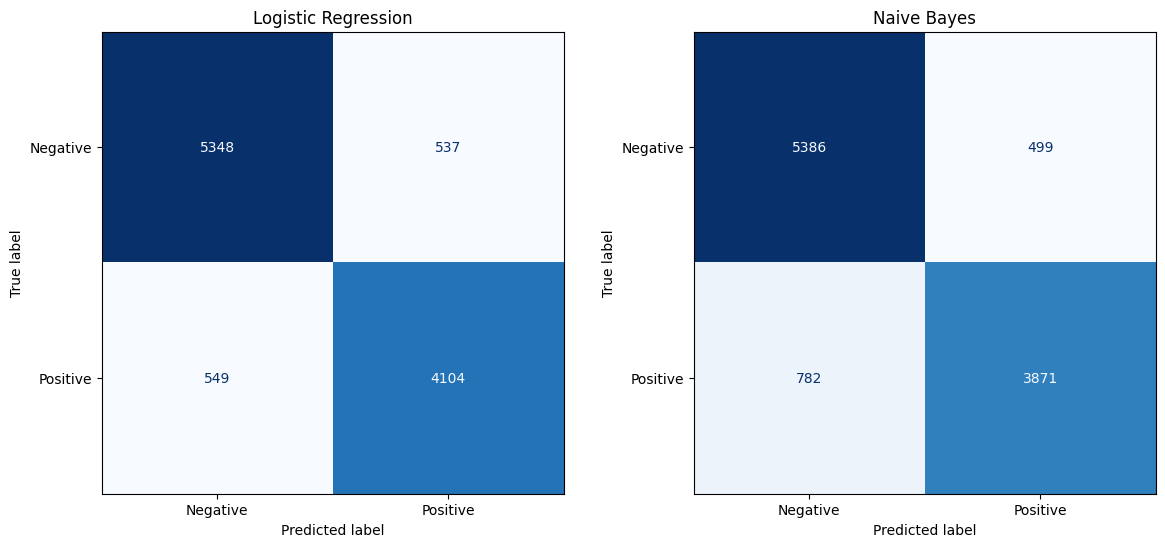

In [ ]:
# BINARY ENCODING


# Data split
X6_train, X6_test, y6_train, y6_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)


# Pipeline initialization
binary_pipeline_logreg = Pipeline([
    ('count', CountVectorizer(binary=True)),
    ('logreg', LogisticRegression(max_iter=500, penalty='l2'))
])

binary_pipeline_nb = Pipeline([
    ('count', CountVectorizer(binary=True)),
    ('nb', MultinomialNB())
])


# Gridsearch initialization and fitting
binary_gridsearch_logreg = GridSearchCV(binary_pipeline_logreg, param_grid={'count__ngram_range':[(1, 1), (1, 2)], 'logreg__C': [0.1, 1]}, cv=3, scoring='accuracy')
binary_gridsearch_nb = GridSearchCV(binary_pipeline_nb, param_grid={'count__ngram_range':[(1, 1), (1, 2)], 'nb__alpha': [ 0.1, 1]}, cv=3, scoring='accuracy')

binary_gridsearch_logreg.fit(X6_train, y6_train)
binary_gridsearch_nb.fit(X6_train, y6_train)


# Prediction and results
best_binary_logreg = binary_gridsearch_logreg.best_estimator_
binary_pred_logreg = best_binary_logreg.predict(X6_test)
binary_classification_report_logreg = classification_report(y6_test, binary_pred_logreg, output_dict=True)
binary_roc_auc_score_logreg = roc_auc_score(y6_test, best_binary_logreg.predict_proba(X6_test)[:, 1])
binary_cm_logreg = confusion_matrix(y6_test, binary_pred_logreg)

best_binary_nb = binary_gridsearch_nb.best_estimator_
binary_pred_nb = best_binary_nb.predict(X6_test)
binary_classification_report_nb = classification_report(y6_test, binary_pred_nb, output_dict=True)
binary_roc_auc_score_nb = roc_auc_score(y6_test, best_binary_nb.predict_proba(X6_test)[:, 1])
binary_cm_nb = confusion_matrix(y6_test, binary_pred_nb)


# Results display
binary_classification_report_df_logreg = pd.DataFrame(binary_classification_report_logreg).transpose()
binary_classification_report_df_nb = pd.DataFrame(binary_classification_report_nb).transpose()

print("LOGISTIC REGRESSION\n")
print("Best params: ", binary_gridsearch_logreg.best_params_)
print("\nClassification Report:")
display(pd.DataFrame(binary_classification_report_logreg).transpose())
print("\nROC AUC Score: ", binary_roc_auc_score_logreg)

print("\n\nNAIVE BAYES\n")
print("Best params: ", binary_gridsearch_nb.best_params_)
print("\nClassification Report:")
display(pd.DataFrame(binary_classification_report_nb).transpose())
print("\nROC AUC Score: ", binary_roc_auc_score_nb)
print()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=binary_cm_logreg, display_labels=["Negative", "Positive"])
disp1.plot(ax=axes[0], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[0].set_title("Logistic Regression");

disp2 = ConfusionMatrixDisplay(confusion_matrix=binary_cm_nb, display_labels=["Negative", "Positive"])
disp2.plot(ax=axes[1], include_values=True, cmap=plt.cm.Blues, values_format="d", colorbar=False);
axes[1].set_title("Naive Bayes");

The Binary Encoding approach to feature selection resulted very similar scoring to the Frequency Vectors method.

While Binary Encoding doesn't directly encode the frequency with which a word appears, more frequent words still have a stronger correlation with their label by virtue of simply showing up more.

**Total Results Analysis**

Overall, the TF-IDF based feature extraction produced results more weighted towards negative labels, increasing the frequency of false nevatives compared to false positives. The simpler methods, Frequency Vectors and Binary Encoding, showed an overall balanced level of false negatives and false positives.

The Logarithmic Regression model also performed better than the Naive Bayes model in all cases.